In [5]:

#importing packages
%matplotlib inline
import scipy.stats as stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')


In [6]:
df = pd.read_csv('creditcard.csv')

In [7]:
print('This data frame has {} rows and {} columns.'.format(df.shape[0], df.shape[1]))

This data frame has 284807 rows and 31 columns.


In [9]:
df.sample(9)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
10656,17990.0,-0.768433,-0.035878,2.174008,-0.705848,-0.657877,1.146218,-0.520821,0.167012,0.847428,...,-0.129529,0.028775,-0.351210,-0.948693,0.215730,-0.078724,-0.123755,0.058659,72.00,0
188640,128062.0,2.055448,0.333259,-1.707618,0.539365,0.293409,-1.515167,0.374594,-0.475744,0.378611,...,0.206721,0.839738,-0.038081,0.011317,0.298297,-0.108638,0.007730,-0.025674,4.19,0
249745,154558.0,-0.069641,0.402090,-0.639336,-0.449528,1.088753,-0.589754,1.020978,-0.036460,-0.438573,...,-0.098463,-0.473532,0.462690,0.584518,-1.082033,-0.028242,0.065731,0.159878,89.00,0
107005,70232.0,-1.289634,1.778119,0.442824,0.922328,-0.532608,-0.790002,0.233336,0.497975,-0.942299,...,0.288703,0.567968,-0.040387,0.429752,-0.207640,-0.370060,-0.441810,-0.006619,23.60,0
18324,29386.0,1.501540,-0.797578,-0.054047,-1.312796,-1.080745,-1.066227,-0.509636,-0.313412,-2.248904,...,-0.123752,0.096364,-0.010003,0.415225,0.571994,-0.074196,0.015538,0.006253,10.00,0
35812,38277.0,-0.707806,1.201706,2.170088,4.071889,-0.142509,0.389549,0.979804,0.046123,-2.170119,...,0.150228,0.103839,0.039954,0.351290,0.198899,0.296377,0.026831,0.099383,132.91,0
134121,80654.0,-2.428963,1.618493,1.397343,2.591675,-0.533764,0.452869,-0.386286,0.582895,-0.527963,...,-0.192490,-0.134137,0.121422,-0.037518,0.138710,0.079081,-0.660792,-0.332281,15.80,0
247144,153477.0,-0.051897,1.220588,-3.566863,0.197854,1.151012,-1.409815,2.064243,-0.094816,-0.374775,...,0.490813,1.295464,0.344343,0.282131,-0.935678,-0.417843,0.426363,0.405848,191.26,0
89406,62564.0,-1.135453,1.149817,1.644546,0.457764,-0.013526,-0.958550,1.130793,-0.480494,-0.050087,...,-0.140589,-0.251039,-0.074796,0.660289,-0.130948,-0.686839,-0.327212,0.023639,42.49,0


In [10]:

#info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [12]:
#numerical summary -> only non-anonymized columns of interest
pd.set_option('precision', 3)
df.loc[:, ['Time', 'Amount']].describe()

,Time,Amount
count,284807.000,284807.000
mean,94813.860,88.350
std,47488.146,250.120
min,0.000,0.000
25%,54201.500,5.600
50%,84692.000,22.000
75%,139320.500,77.165
max,172792.000,25691.160


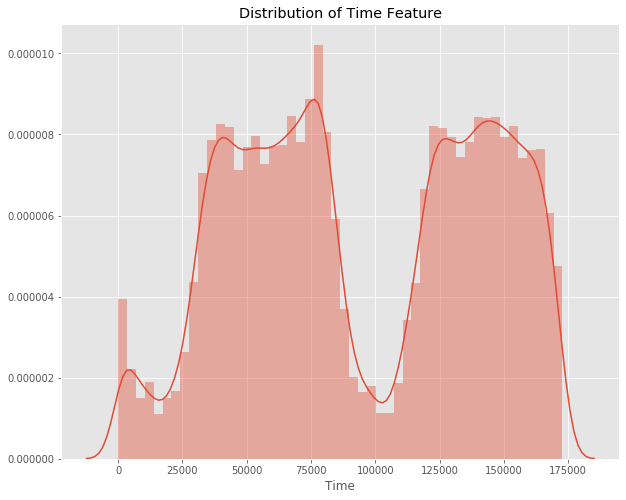

In [13]:

#visualizations of time and amount
plt.figure(figsize=(10,8))
plt.title('Distribution of Time Feature')
sns.distplot(df.Time)

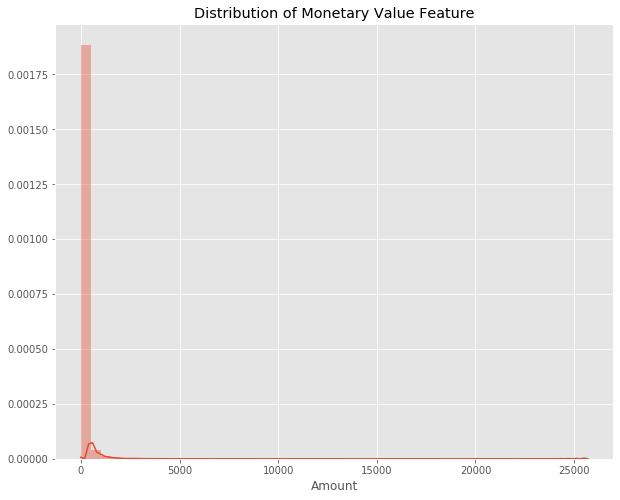

In [14]:

plt.figure(figsize=(10,8))
plt.title('Distribution of Monetary Value Feature')
sns.distplot(df.Amount)

In [15]:

#fraud vs. normal transactions 
counts = df.Class.value_counts()
normal = counts[0]
fraudulent = counts[1]
perc_normal = (normal/(normal+fraudulent))*100
perc_fraudulent = (fraudulent/(normal+fraudulent))*100
print('There were {} non-fraudulent transactions ({:.3f}%) and {} fraudulent transactions ({:.3f}%).'.format(normal, perc_normal, fraudulent, perc_fraudulent))

There were 284315 non-fraudulent transactions (99.827%) and 492 fraudulent transactions (0.173%).


Text(0.5, 0, 'Class (0:Non-Fraudulent, 1:Fraudulent)')

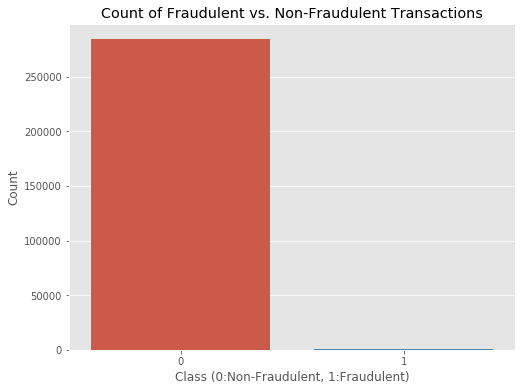

In [16]:

plt.figure(figsize=(8,6))
sns.barplot(x=counts.index, y=counts)
plt.title('Count of Fraudulent vs. Non-Fraudulent Transactions')
plt.ylabel('Count')
plt.xlabel('Class (0:Non-Fraudulent, 1:Fraudulent)')

In [17]:

corr = df.corr()
corr

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000,1.174e-01,-1.059e-02,-4.196e-01,-1.053e-01,1.731e-01,-6.302e-02,8.471e-02,-3.695e-02,-8.660e-03,...,4.474e-02,1.441e-01,5.114e-02,-1.618e-02,-2.331e-01,-4.141e-02,-5.135e-03,-9.413e-03,-1.060e-02,-1.232e-02
V1,0.117,1.000e+00,4.697e-17,-1.424e-15,1.755e-17,6.391e-17,2.398e-16,1.992e-15,-9.491e-17,2.170e-16,...,-1.755e-16,7.477e-17,9.809e-16,7.354e-17,-9.805e-16,-8.622e-17,3.208e-17,9.821e-16,-2.277e-01,-1.013e-01
V2,-0.011,4.697e-17,1.000e+00,2.512e-16,-1.126e-16,-2.040e-16,5.025e-16,3.966e-16,-4.414e-17,-5.729e-17,...,8.444e-17,2.501e-16,1.060e-16,-8.142e-18,-4.262e-17,2.602e-16,-4.478e-16,-3.676e-16,-5.314e-01,9.129e-02
V3,-0.420,-1.424e-15,2.512e-16,1.000e+00,-3.417e-16,-1.437e-15,1.432e-15,2.169e-15,3.433e-16,-4.234e-16,...,-2.972e-17,4.648e-16,2.115e-17,-9.352e-17,4.771e-16,6.522e-16,6.240e-16,7.727e-16,-2.109e-01,-1.930e-01
V4,-0.105,1.755e-17,-1.126e-16,-3.417e-16,1.000e+00,-1.941e-15,-2.713e-16,1.556e-16,5.196e-16,3.860e-16,...,-9.977e-17,2.100e-16,6.003e-17,2.230e-16,5.395e-16,-6.180e-16,-6.403e-17,-5.864e-17,9.873e-02,1.334e-01
V5,0.173,6.391e-17,-2.040e-16,-1.437e-15,-1.941e-15,1.000e+00,7.926e-16,-4.210e-16,7.589e-16,4.205e-16,...,-1.369e-16,5.060e-16,1.638e-16,-9.286e-16,5.625e-16,9.145e-16,4.466e-16,-3.299e-16,-3.864e-01,-9.497e-02
V6,-0.063,2.398e-16,5.025e-16,1.432e-15,-2.713e-16,7.926e-16,1.000e+00,1.429e-16,-1.707e-16,1.114e-16,...,-1.576e-16,-3.363e-16,-7.232e-17,-1.262e-15,1.082e-15,-2.378e-16,-2.624e-16,4.813e-16,2.160e-01,-4.364e-02
V7,0.085,1.992e-15,3.966e-16,2.169e-15,1.556e-16,-4.210e-16,1.429e-16,1.000e+00,-8.692e-17,7.933e-16,...,1.939e-16,-1.058e-15,2.328e-16,-2.590e-17,1.174e-15,-7.335e-16,-5.887e-16,-6.837e-17,3.973e-01,-1.873e-01
V8,-0.037,-9.491e-17,-4.414e-17,3.433e-16,5.196e-16,7.589e-16,-1.707e-16,-8.692e-17,1.000e+00,2.901e-16,...,-2.412e-16,5.476e-16,3.897e-16,-1.803e-16,-1.391e-16,-1.210e-16,1.734e-16,-4.484e-16,-1.031e-01,1.988e-02
V9,-0.009,2.170e-16,-5.729e-17,-4.234e-16,3.860e-16,4.205e-16,1.114e-16,7.933e-16,2.901e-16,1.000e+00,...,4.578e-17,2.872e-17,5.929e-16,-2.346e-16,1.100e-15,-1.389e-15,-2.287e-16,9.147e-16,-4.425e-02,-9.773e-02


Text(0.5, 1, 'Heatmap of Correlation')

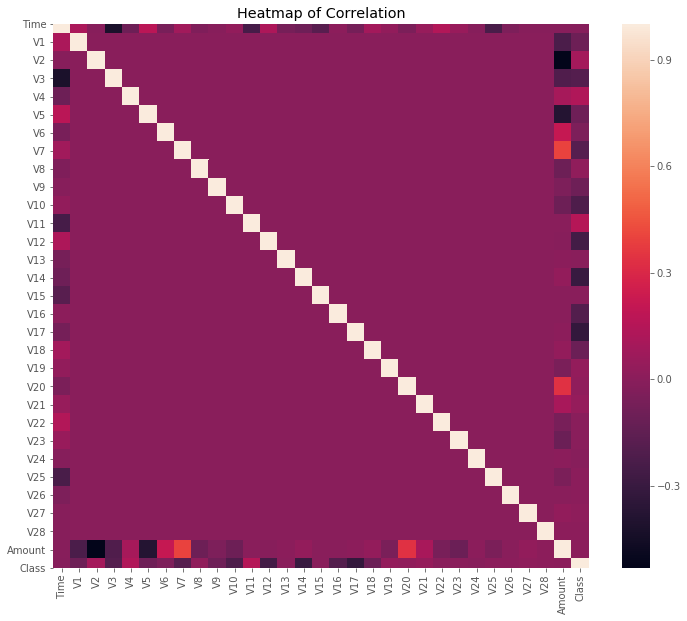

In [18]:
#heatmap
corr = df.corr()
plt.figure(figsize=(12,10))
heat = sns.heatmap(data=corr)
plt.title('Heatmap of Correlation')

In [19]:
skew_ = df.skew()
skew_

Time      -0.036
V1        -3.281
V2        -4.625
V3        -2.240
V4         0.676
V5        -2.426
V6         1.827
V7         2.554
V8        -8.522
V9         0.555
V10        1.187
V11        0.357
V12       -2.278
V13        0.065
V14       -1.995
V15       -0.308
V16       -1.101
V17       -3.845
V18       -0.260
V19        0.109
V20       -2.037
V21        3.593
V22       -0.213
V23       -5.875
V24       -0.552
V25       -0.416
V26        0.577
V27       -1.170
V28       11.192
Amount    16.978
Class     23.998
dtype: float64

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler2 = StandardScaler()
#scaling time
scaled_time = scaler.fit_transform(df[['Time']])
flat_list1 = [item for sublist in scaled_time.tolist() for item in sublist]
scaled_time = pd.Series(flat_list1)

In [22]:
#scaling the amount column
scaled_amount = scaler2.fit_transform(df[['Amount']])
flat_list2 = [item for sublist in scaled_amount.tolist() for item in sublist]
scaled_amount = pd.Series(flat_list2)

In [24]:
#concatenating newly created columns w original df
df = pd.concat([df, scaled_amount.rename('scaled_amount'), scaled_time.rename('scaled_time')], axis=1)
df.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,scaled_amount,scaled_time
216482,140494.0,2.242,-1.426,-0.848,-1.548,-1.414,-0.767,-1.160,-0.094,-1.359,...,0.246,-0.025,-0.257,-0.177,0.002,-0.063,15.00,0,-0.293,0.962
1816,1410.0,-0.393,1.096,1.273,0.012,0.253,-0.511,0.654,0.046,-0.451,...,0.014,0.032,-0.221,0.100,0.264,0.096,3.99,0,-0.337,-1.967
11117,19224.0,1.254,-0.277,0.891,-0.597,-0.967,-0.568,-0.656,-0.096,3.123,...,-0.078,-0.010,0.522,-0.704,0.065,0.027,11.85,0,-0.306,-1.592
121108,76074.0,-2.228,-1.390,2.305,-0.436,0.726,-1.108,-0.461,0.331,0.590,...,0.952,0.518,-0.136,-0.053,0.037,0.147,5.75,0,-0.330,-0.395
154655,102406.0,-0.796,0.710,1.755,-0.367,0.681,-0.021,0.485,0.103,1.381,...,-0.234,0.570,0.224,-0.800,0.087,0.136,26.65,0,-0.247,0.160


In [25]:
#dropping old amount and time columns
df.drop(['Amount', 'Time'], axis=1, inplace=True)

In [26]:
#manual train test split using numpy's random.rand
mask = np.random.rand(len(df)) < 0.9
train = df[mask]
test = df[~mask]
print('Train Shape: {}\nTest Shape: {}'.format(train.shape, test.shape))

Train Shape: (256442, 31)
Test Shape: (28365, 31)


In [27]:

train.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)

In [28]:
#how many random samples from normal transactions do we need?
no_of_frauds = train.Class.value_counts()[1]
print('There are {} fraudulent transactions in the train data.'.format(no_of_frauds))

There are 439 fraudulent transactions in the train data.


In [30]:
#randomly selecting 442 random non-fraudulent transactions
non_fraud = train[train['Class'] == 0]
fraud = train[train['Class'] == 1]

In [31]:
selected = non_fraud.sample(no_of_frauds)
selected.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
182765,-1.084,-0.729,1.124,-1.160,1.495,0.074,-0.453,0.559,0.960,-1.198,...,1.547,0.096,-0.973,-8.199e-01,-0.373,0.242,0.231,0,-0.353,0.837
114631,-0.650,-0.369,1.011,-1.547,-1.374,0.270,-0.604,0.584,-2.969,1.064,...,0.092,0.116,-0.350,-1.349e-01,-0.039,-0.018,0.026,0,0.065,-0.349
223535,2.237,-1.277,-0.509,-1.244,-1.814,-1.617,-0.961,-0.372,-1.295,1.581,...,0.210,0.340,0.914,-2.875e-01,-0.218,0.010,-0.042,0,-0.293,1.242
139899,2.006,-0.198,-0.277,0.569,-0.268,0.039,-0.691,-0.093,2.550,-0.584,...,0.863,0.111,0.613,3.920e-04,-0.220,0.024,-0.037,0,-0.345,0.215
203772,-0.953,1.821,-0.938,0.513,1.675,1.111,0.736,-0.540,0.060,0.955,...,0.757,-0.012,-0.348,-4.671e-01,-0.377,0.904,0.487,0,-0.337,1.047


In [33]:
#concatenating both into a subsample data set with equal class distribution
selected.reset_index(drop=True, inplace=True)
fraud.reset_index(drop=True, inplace=True)

In [34]:
subsample = pd.concat([selected, fraud])
len(subsample)

878

In [35]:

#shuffling our data set
subsample = subsample.sample(frac=1).reset_index(drop=True)
subsample.head(10)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,1.068,-0.813,0.461,0.508,-0.863,0.155,-0.460,-0.104,-0.617,0.587,...,-0.172,-0.305,-0.430,0.630,-0.191,0.058,0.055,0,0.278,-1.075
1,2.330,-1.243,-1.076,-1.618,-0.955,-0.515,-1.025,-0.219,-1.336,1.552,...,0.047,0.258,0.602,-0.122,-0.185,0.013,-0.046,0,-0.333,0.819
2,1.184,0.054,0.329,0.677,-0.548,-1.045,0.119,-0.187,0.161,-0.047,...,-0.674,0.055,0.368,0.270,0.172,-0.049,0.021,0,-0.175,-0.852
3,-3.569,-2.805,-1.484,-3.558,1.299,-3.188,1.105,-0.484,-0.581,-1.739,...,0.178,-1.688,0.225,1.637,-0.460,0.380,-0.938,0,0.701,1.423
4,1.416,-1.086,0.510,-1.432,-1.462,-0.367,-1.123,0.054,-2.036,1.582,...,-0.006,0.083,0.185,0.237,-0.205,0.039,0.008,0,-0.293,-0.594
5,-1.021,1.497,-4.491,1.837,0.627,-2.736,-1.546,0.460,-0.683,-4.363,...,0.861,-0.305,-0.155,0.412,-0.220,0.392,-0.020,1,-0.265,0.158
6,-0.242,0.070,1.873,-1.042,-0.760,-0.355,-0.062,0.088,-0.943,-0.012,...,0.160,-0.039,0.395,-0.151,-0.363,0.087,0.056,0,-0.313,-1.162
7,-0.330,1.335,1.795,2.490,0.461,-0.362,0.605,-0.172,-0.165,0.089,...,0.369,-0.111,0.348,-0.385,0.021,0.121,0.162,0,-0.323,-1.531
8,-0.977,0.149,1.401,0.180,0.949,-1.340,1.027,-0.540,-0.103,0.336,...,-0.646,0.057,0.578,-0.768,-0.125,-0.014,-0.256,0,-0.141,-1.167
9,1.180,-0.456,0.999,-0.689,-1.266,-0.564,-0.707,0.138,1.938,-1.097,...,0.312,0.045,0.398,0.352,-0.674,0.104,0.033,0,-0.349,-0.354


Text(0.5, 0, 'Class (0:Non-Fraudulent, 1:Fraudulent)')

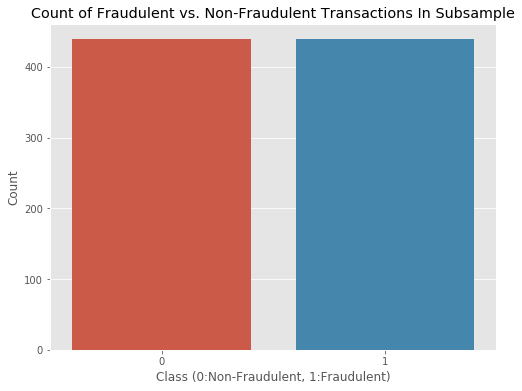

In [36]:
new_counts = subsample.Class.value_counts()
plt.figure(figsize=(8,6))
sns.barplot(x=new_counts.index, y=new_counts)
plt.title('Count of Fraudulent vs. Non-Fraudulent Transactions In Subsample')
plt.ylabel('Count')
plt.xlabel('Class (0:Non-Fraudulent, 1:Fraudulent)')

In [37]:

#taking a look at correlations once more
corr = subsample.corr()
corr = corr[['Class']]
corr

,Class
V1,-0.435
V2,0.505
V3,-0.572
V4,0.710
V5,-0.363
V6,-0.419
V7,-0.471
V8,0.063
V9,-0.556
V10,-0.631


In [38]:

#negative correlations smaller than -0.5
corr[corr.Class < -0.5]

,Class
V3,-0.572
V9,-0.556
V10,-0.631
V12,-0.681
V14,-0.746
V16,-0.594
V17,-0.562


In [39]:
#positive correlations greater than 0.5
corr[corr.Class > 0.5]

,Class
V2,0.505
V4,0.710
V11,0.679
Class,1.000


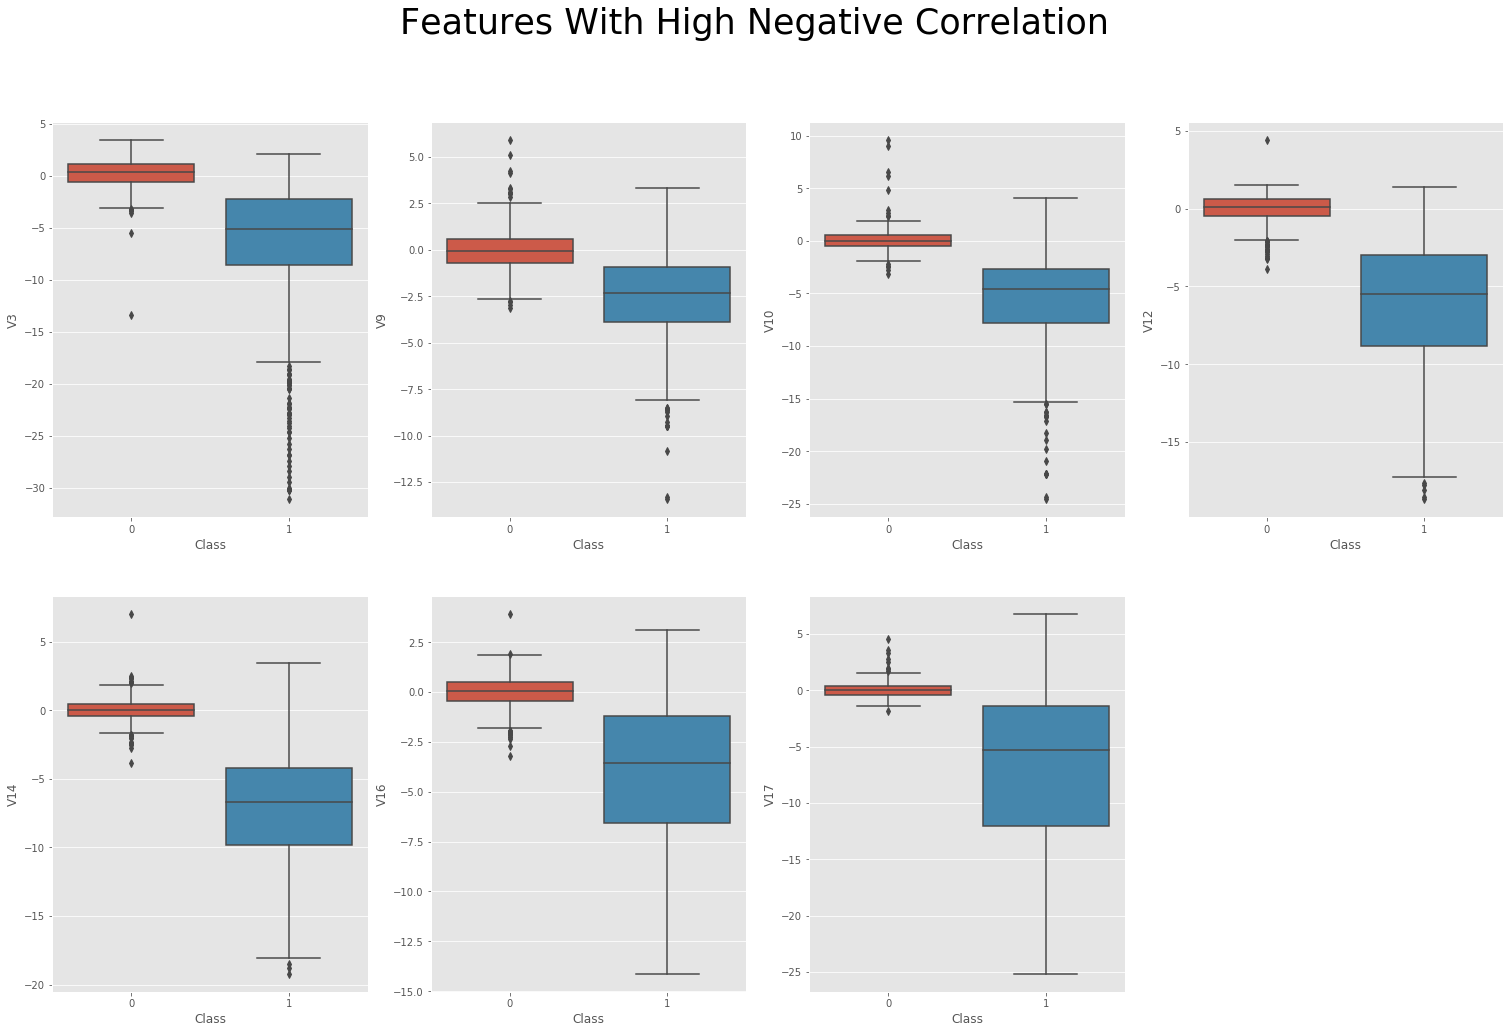

In [40]:

#visualizing the features w high negative correlation
f, axes = plt.subplots(nrows=2, ncols=4, figsize=(26,16))

f.suptitle('Features With High Negative Correlation', size=35)
sns.boxplot(x="Class", y="V3", data=subsample, ax=axes[0,0])
sns.boxplot(x="Class", y="V9", data=subsample, ax=axes[0,1])
sns.boxplot(x="Class", y="V10", data=subsample, ax=axes[0,2])
sns.boxplot(x="Class", y="V12", data=subsample, ax=axes[0,3])
sns.boxplot(x="Class", y="V14", data=subsample, ax=axes[1,0])
sns.boxplot(x="Class", y="V16", data=subsample, ax=axes[1,1])
sns.boxplot(x="Class", y="V17", data=subsample, ax=axes[1,2])
f.delaxes(axes[1,3])

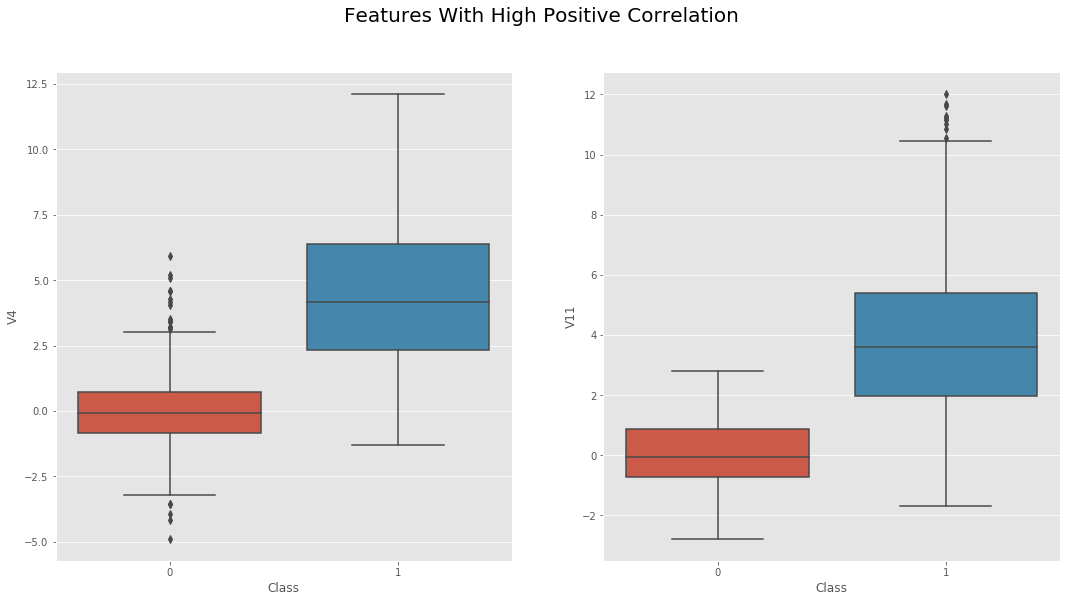

In [41]:
#visualizing the features w high positive correlation
f, axes = plt.subplots(nrows=1, ncols=2, figsize=(18,9))

f.suptitle('Features With High Positive Correlation', size=20)
sns.boxplot(x="Class", y="V4", data=subsample, ax=axes[0])
sns.boxplot(x="Class", y="V11", data=subsample, ax=axes[1])

In [42]:
Q1 = subsample.quantile(0.25)
Q3 = subsample.quantile(0.75)
IQR = Q3 - Q1

df2 = subsample[~((subsample < (Q1 - 2.5 * IQR)) |(subsample > (Q3 + 2.5 * IQR))).any(axis=1)]

In [43]:
len_after = len(df2)
len_before = len(subsample)
len_difference = len(subsample) - len(df2)
print('We reduced our data size from {} transactions by {} transactions to {} transactions.'.format(len_before, len_difference, len_after))

We reduced our data size from 878 transactions by 264 transactions to 614 transactions.


In [44]:

from sklearn.manifold import TSNE

X = df2.drop('Class', axis=1)
y = df2['Class']

In [45]:
#t-SNE
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)

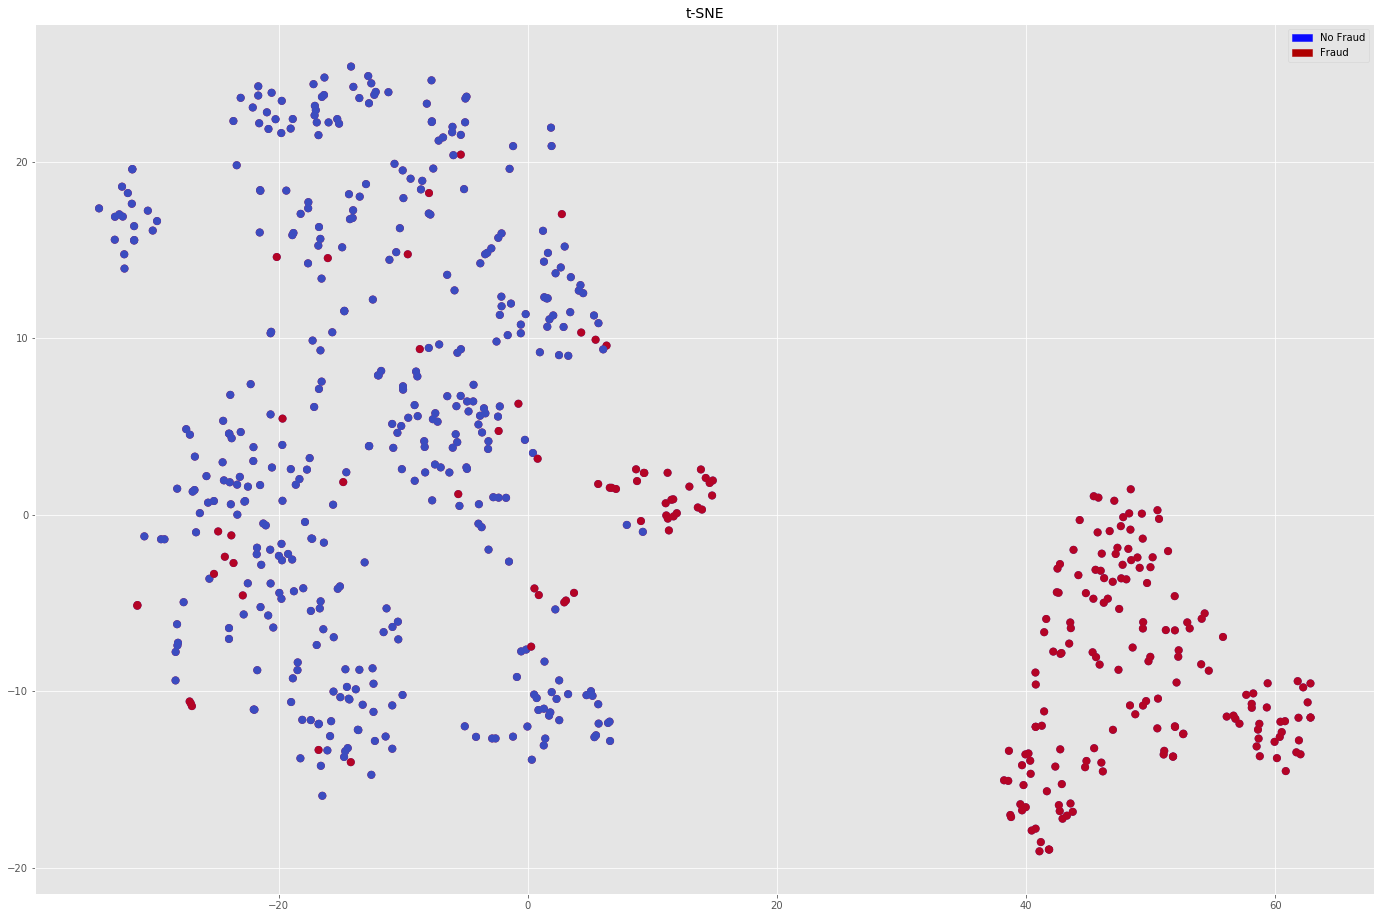

In [46]:

# t-SNE scatter plot
import matplotlib.patches as mpatches

f, ax = plt.subplots(figsize=(24,16))


blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')

ax.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax.set_title('t-SNE', fontsize=14)

ax.grid(True)

ax.legend(handles=[blue_patch, red_patch])

In [47]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [48]:

# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:

X_train = X_train.values
X_validation = X_test.values
y_train = y_train.values
y_validation = y_test.values

In [50]:

print('X_shapes:\n', 'X_train:', 'X_validation:\n', X_train.shape, X_validation.shape, '\n')
print('Y_shapes:\n', 'Y_train:', 'Y_validation:\n', y_train.shape, y_validation.shape)

X_shapes:
 X_train: X_validation:
 (491, 30) (123, 30) 

Y_shapes:
 Y_train: Y_validation:
 (491,) (123,)


In [52]:

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

In [53]:
##Spot-Checking Algorithms

models = []

models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', SVC()))
models.append(('XGB', XGBClassifier()))
models.append(('RF', RandomForestClassifier()))

#testing models

results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10, random_state=42)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='roc_auc')
    results.append(cv_results)
    names.append(name)
    msg = '%s: %f (%f)' % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.977284 (0.023273)
LDA: 0.971174 (0.025958)
KNN: 0.963600 (0.035758)
CART: 0.918016 (0.047296)
SVM: 0.969367 (0.024515)
XGB: 0.973716 (0.021920)
RF: 0.964964 (0.036202)


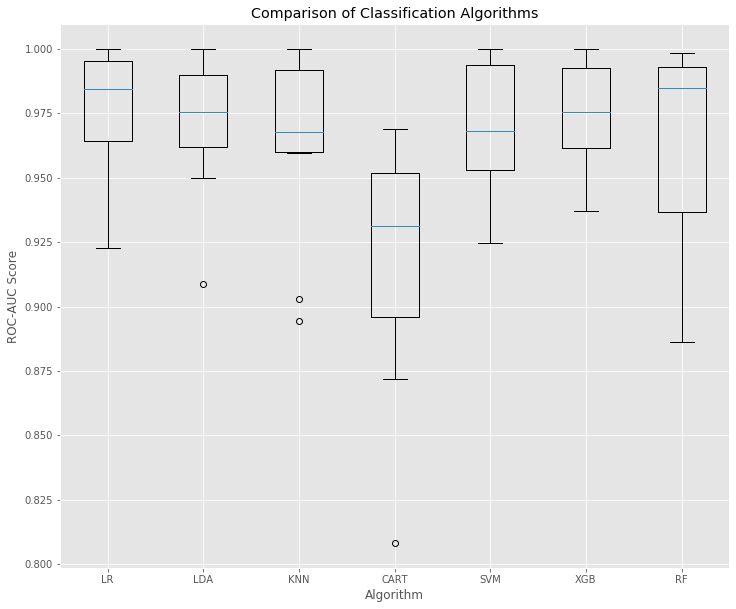

In [54]:
fig = plt.figure(figsize=(12,10))
plt.title('Comparison of Classification Algorithms')
plt.xlabel('Algorithm')
plt.ylabel('ROC-AUC Score')
plt.boxplot(results)
ax = fig.add_subplot(111)
ax.set_xticklabels(names)
plt.show()

In [58]:

model = RandomForestClassifier(n_estimators=10)

# Train
model.fit(X_train, y_train)
y_pred=model.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.943089430894309
